In [1]:
import plotly
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import json

In [6]:
base_data="53.2 & 48.7 & 47.3 & 33.5 & 1510.7 & 69.3 & 35.3 & 46.0 & 61.9 & 64.3 & 76.6".split(" & ")
balanced_data = "55.3 & 57.2 & 46.8 & 33.8 & 1470.6 & 69.5 & 34.8 & 46.0 & 62.8 & 65.5 & 76.9".split(" & ")
aug_data = "57.4 & 57.4 & 49.6 & 35.5 & 1512.8 & 70.4 & 36.7 & 47.2 & 62.9 & 65.0 & 76.9".split(" & ")
base_data = [float(x) for x in base_data]
balanced_data = [float(x) for x in balanced_data]
aug_data = [float(x) for x in aug_data]
benchmarks = "VQA$^\\text{OK}$ & SEED$^{\\text{2}}$ & QB$^\\text{2}$ & MMS & MME$^\\text{P}$ & SQA$^\\text{I}$ & MMMU & VQA$^\\text{T}$ & GQA & MMB & VQA$^\\text{v2}$".split(" & ")
assert len(base_data) == len(balanced_data) == len(aug_data) == len(benchmarks)



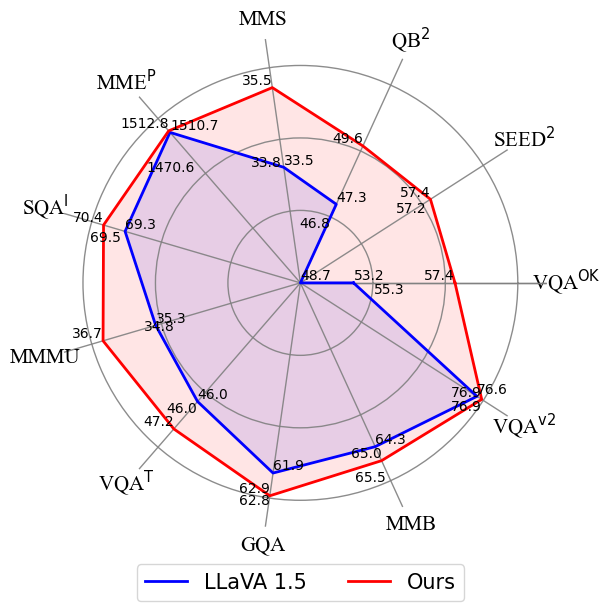

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

# 示例数据
# base_data = np.array([1, 2, 3, 4, 5])
# balanced_data = np.array([2, 3, 4, 5, 6])
# aug_data = np.array([1, 1, 1, 1, 1])
# benchmarks = ['A', 'B', 'C', 'D', 'E']

# 计算比例
max_data = [60,60,52,36,1530,71,37,48,63,66,77]
r_base = [i/j if i/j >0.85 else 0.85 for i,j in zip(base_data, max_data) ]
r_balanced = [i/j for i,j in zip(balanced_data, max_data)]
r_ours = [i/j for i,j in zip(aug_data, max_data)]

base_color = "blue"
balance_color = "green"
aug_color = "red"

# 将数据补齐闭合雷达图
r_base.append(r_base[0])
r_balanced.append(r_balanced[0])
r_ours.append(r_ours[0])
theta = np.linspace(0, 2 * np.pi, len(benchmarks), endpoint=False).tolist()
theta.append(theta[0])

# 创建图形
fig, ax = plt.subplots(figsize=(6.4, 6.4), subplot_kw={'projection': 'polar'})

# 绘制雷达图
ax.plot(theta, r_base, color=base_color, linestyle='-', label='LLaVA 1.5',linewidth=2)
ax.fill(theta, r_base, color=base_color, alpha=0.1)

# ax.plot(theta, r_balanced, color=balance_color, linestyle='-', label='Balanced',linewidth=2)
# ax.fill(theta, r_balanced, color=balance_color, alpha=0.1)

ax.plot(theta, r_ours, color=aug_color, linestyle='-', label='Ours',linewidth=2)
ax.fill(theta, r_ours, color=aug_color, alpha=0.1)

# 添加数据标签
for i, txt in enumerate(base_data):
    # if i == 0 or i ==1:
    #     continue
    ax.text(theta[i], r_base[i], f"{txt:.1f}", color="k" ,ha='left',va='bottom')
for i, txt in enumerate(balanced_data):
    ax.text(theta[i], r_balanced[i], f"{txt:.1f}", color="black", ha='right',va='top')
for i, txt in enumerate(aug_data):
    ax.text(theta[i], r_ours[i], f"{txt:.1f}", color="black", ha='right',va='bottom')

# rotate_labels = benchmarks
ax.set_thetagrids(angles=np.linspace(0, 360, len(benchmarks)+1), labels=benchmarks+[""])
labels = ax.get_xticklabels()
font_path = './Times New Roman.ttf'
font_prop = FontProperties(fname=font_path)
for label in labels:
    label.set_fontsize(12)  # 设置字体大小
    label.set_color('black')  # 设置字体颜色
    label.set_fontproperties(font_prop)  # 设置字体类型

ax.set_yticklabels([])
ax.set_rgrids(np.arange(0.85, 1.02, 0.05),)  # 例如，设置每0.2单位一条径向网格线
plt.grid(True, color='black', linestyle='--', linewidth=1, alpha=0.9)
# 设置背景颜色、网格线颜色、以及图形属性
ax.set_facecolor('white')
ax.xaxis.grid(True, color='gray', linestyle='-')
ax.yaxis.grid(True, color='gray', linestyle='-')
ax.spines['polar'].set_color('black')  # 设置最外圈颜色
ax.spines['polar'].set_linewidth(1)    # 设置最外圈线宽
ax.spines['polar'].set_visible(False)

# 设置极轴的范围
ax.set_ylim(0.85, 1.02)

# 设置角度标签的字体大小
ax.tick_params(axis='x', which='major', labelsize=15)

# 添加图例
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=True,fontsize=15,)
fig.savefig('./res/llava_radar.pdf', format='pdf',bbox_inches='tight')
# 显示图形
plt.show()

In [54]:
print(f"len of base_data: {len(base_data)} len of rbase: {len(r_base)}, len of theta: {len(theta)}, len of rbalance: {len(r_balanced)}")

len of base_data: 16 len of rbase: 17, len of theta: 17, len of rbalance: 17


In [16]:

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      mode='lines+text',
      r=[i/j for i,j in zip(base_data+[base_data[0]],aug_data+[aug_data[0]])],
      theta= benchmarks + [benchmarks[0]],
      fill= 'toself',
      name= 'Base',
      line=dict(color='orange', dash='solid'),
      text=[f"{i:.1f}" for i in base_data+[base_data[0]]],
      textposition='middle left',
      textfont=dict(color='orange') 
))
fig.add_trace(go.Scatterpolar(
      mode='lines+text',
      r=[i/j for i,j in zip(balanced_data+[balanced_data[0]],aug_data+[aug_data[0]])],
      theta= benchmarks + [benchmarks[0]],
      fill= 'none',
      name= 'Balanced',
      line=dict(color='green', dash='solid'),
      text=[f"{i:.1f}" for i in balanced_data+[balanced_data[0]]],
      textposition='middle right',
      textfont=dict(color='green') 
))

fig.add_trace(go.Scatterpolar(
      mode='lines+text',
      r=[i/j for i,j in zip(aug_data+[aug_data[0]],aug_data+[aug_data[0]])],
      theta= benchmarks + [benchmarks[0]],
      fill= 'none',
      name= 'Ours',
      line=dict(color='blue', dash='solid'),
      text=[f"{i:.1f}" for i in aug_data+[aug_data[0]]],
      textposition='middle left',
      textfont=dict(color='blue') 
))



fig.update_layout(
    polar=dict(
        bgcolor='white',
        radialaxis=dict(
            visible=True,
            showgrid=True,
            gridcolor='lightgray',  # 设置径向网格线的颜色
            showticklabels=False,
            tickvals=[0.85, 0.9, 0.95, 1.0, 1.02],  # 设置径向网格线的间距
            range=[0.85, 1.02],
            
        ),
        angularaxis=dict(
            tick0='auto',
            tickfont=dict(size=15),  # 设置分类标签的字体大小
            showgrid=True,
            gridcolor='lightgray',  # 设置角度网格线的颜色
            linecolor='black',  # 设置最外圈的颜色为黑色
            linewidth=1  # 设置最外圈的线宽为2
        )

    ),
    showlegend=True,
    legend=dict(
        x=0.5,  # 调整图例的水平位置
        y=-0.1,  # 调整图例的垂直位置
        bgcolor='rgba(255, 255, 255, 0.6)',  # 设置图例的背景颜色及透明度
        bordercolor='rgba(0, 0, 0, 0.1)',  # 设置图例的边框颜色为黑色
        borderwidth=2,  # 设置图例的边框宽度为2像素
        xanchor='center',  # 图例的x锚点为中心
        yanchor='top',     # 图例的y锚点为顶部
        orientation='h',   # 图例水平排列
        traceorder="normal",  # 控制图例中图例项的顺序
        font=dict(  # 设置图例文字的属性
            # family="Times New Roman",  # 设置字体
            size=13,  # 设置文字大小
            color="black"  # 设置文字颜色
        ),
        itemsizing='trace'  # 设置图例项的大小为常量
    ),
  
    
    height=640,  # 设置画布高度
    width=640  # 设置画布宽度
)


fig.show()
pio.write_image(fig, f"res/llava_radar.pdf")


NameError: name 'go' is not defined

In [ ]:

eval_type_dict = {
    "Perception": [
        "existence",
        "count",
        "position",
        "color",
        "posters",
        "celebrity",
        "scene",
        "landmark",
        "artwork",
        "OCR",
    ],
    "Cognition": [
        "commonsense_reasoning",
        "numerical_calculation",
        "text_translation",
        "code_reasoning",
    ],
}

low_resource = "bn ta ur ml mr te gu my jv sw".split()
medium_resource = "id sv ar fa ko el th uk bg hi".split()
high_resource = "en ru de zh ja fr es it nl pt vi ".split()


type_list = eval_type_dict["Perception"] + eval_type_dict["Cognition"]

metric_list=[]
for i in type_list:
    metric_list.append(i+"_acc")
    # metric_list.append(i+"_acc_plus")
# metric_list.append("percetion_score")
# metric_list.append("cognition_score")

In [4]:
def get_data_by_lang(lang,input_json_file_path, metric_list=metric_list):
    with open(input_json_file_path, 'r') as f:
        result = json.load(f)
    result_data = result["results"]
    
    language_index = f"mme_mul_{lang}"
    result_chart = {}
    for metric in metric_list:
        metric_index = f"mme_{metric},none"
        result_chart[metric]=result_data[language_index][metric_index]
    
    return result_chart

In [20]:

language = "uk"
math_tasks_categories = ['Ambiguity', 'Duration', 'Frequency', 'Causality', 'Nli', 'Ordering', 'Relation', 'Storytelling', 'Ambiguity (Math)', 'Arithmetic (Math)', 'Duration (Math)', 'Frequency (Math)', 'Typical time']
math_tasks_categories = ["Existence",
        "Count",
        "Position",
        "Color",
        "Posters",
        "Celebrity",
        "Scene",
        "Landmark",
        "Artwork",
        "OCR","Commonsense Reasoning",
        "Numerical Calculation",
        "Text Translation",
        "Code Reasoning",
        ]
baseline_results_chart = get_data_by_lang(language, baseline_result_data_file)
bleu_results_chart = get_data_by_lang(language, loss_t_1101_24k)
trans_results_chart = get_data_by_lang(language,trans)
mblip_results_chart = get_data_by_lang(language,mblip)

baseline_results_list = [v for _,v in baseline_results_chart.items()]
bleu_results_list = [v for _,v in bleu_results_chart.items()]
trans_results_list = [v for _,v in trans_results_chart.items()]
mblip_results_list = [v for _,v in mblip_results_chart.items()]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      mode='lines+text',
      r=[i/j for i,j in zip(baseline_results_list+[baseline_results_list[0]],bleu_results_list+[bleu_results_list[0]])],
      theta= math_tasks_categories + [math_tasks_categories[0]],
      fill= 'toself',
      name= 'Base',
      line=dict(color='orange', dash='solid'),
      text=[f"{i:.1f}" for i in baseline_results_list+[baseline_results_list[0]]],
      textposition='middle left',
))

fig.add_trace(go.Scatterpolar(
      mode='lines+text',
      r=[i/j for i,j in zip(bleu_results_list+[bleu_results_list[0]],bleu_results_list+[bleu_results_list[0]])],
      theta= math_tasks_categories + [math_tasks_categories[0]],
      fill= 'none',
      name= 'Ours',
      line=dict(color='blue', dash='solid'),
      text=[f"{i:.1f}" for i in bleu_results_list+[bleu_results_list[0]]],
      textposition='middle left',
))

# fig.add_trace(go.Scatterpolar(
#       mode='lines+text',
#       r=[i/j for i,j in zip(trans_results_list+[trans_results_list[0]],bleu_results_list+[bleu_results_list[0]])],
#       theta= math_tasks_categories + [math_tasks_categories[0]],
#       fill= 'none',
#       name= 'Trans',
#       line=dict(color='pink', dash='solid'),
#       text=[f"{i:.1f}" for i in trans_results_list+[trans_results_list[0]]],
#       textposition='middle left',
# ))

# fig.add_trace(go.Scatterpolar(
#       mode='lines+text',
#       r=[i/j for i,j in zip(mblip_results_list+[mblip_results_list[0]],bleu_results_list+[bleu_results_list[0]])],
#       theta= math_tasks_categories + [math_tasks_categories[0]],
#       fill= 'none',
#       name= 'MBLIP',
#       line=dict(color='green', dash='solid'),
#       text=[f"{i:.1f}" for i in trans_results_list+[trans_results_list[0]]],
#       textposition='middle left',
# ))



fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True, 
            showgrid=True,
            showticklabels=False,
            range=[0.5, 1.05]
        ),
        angularaxis=dict(
            tick0='auto',
            tickfont=dict(size=18)  # 设置分类标签的字体大小
        )
    ),
    showlegend=True,
    legend=dict(
        # x=0.95,  # 调整图例的水平位置
        # y=-0.15,  # 调整图例的垂直位置
        # bgcolor='rgba(255, 255, 255, 0.6)',  # 设置图例的背景颜色及透明度
        # bordercolor='rgba(0, 0, 0, 0.2)',  # 设置图例的边框颜色及透明度
        # borderwidth=2,  # 设置图例的边框宽度
        traceorder="normal",  # 控制图例中图例项的顺序
        font=dict(  # 设置图例文字的属性
            # family="Times New Roman",  # 设置字体
            size=20,  # 设置文字大小
            color="black"  # 设置文字颜色
        ),
        itemsizing='trace'  # 设置图例项的大小为常量
    ),
    
    height=620,  # 设置画布高度
    width=760  # 设置画布宽度
)


fig.show()
pio.write_image(fig, f"res/radar_{language}.pdf")


In [47]:


math_tasks_categories = ['Ambiguity', 'Duration', 'Frequency', 'Causality', 'Nli', 'Ordering', 'Relation', 'Storytelling', 'Ambiguity (Math)', 'Arithmetic (Math)', 'Duration (Math)', 'Frequency (Math)', 'Typical time']

llama_data = [70.0, 74.4, 80.5, 90.5, 50.0, 40.0, 44.0, 67.0, 52.3, 60.9, 58.5, 70.0, 82.0]
llama_data_text = [86.0, 77.4, 87.5, 95.5, 55.0, 44.0, 44.0, 71.0, 61.3, 63.9, 58.5, 81.0, 82.0]
mathllama_data = [80.0, 62.4, 70.5, 97.5, 56.0, 45.0, 52.0, 75.0, 60.3, 69.0, 72.0, 80.5, 74.0]
mathllama_data_text = [88.0, 74.4, 84.5, 97.5, 56.0, 45.0, 52.0, 75.0, 64.3, 69.0, 72.0, 84.5, 78.0]
timo_data = [92.0, 78.2, 90.5, 97.5, 87.0, 79.5, 78.0, 83.0, 65.0, 66.3, 76.5, 85.5, 89.5]
timo_data_text = [92.0, 78.2, 90.5, 97.5, 87.0, 79.5, 78.0, 83.0, 65.0, 66.3, 76.5, 85.5, 89.5]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      mode='lines+text',
      r=[i/j for i,j in zip(llama_data + [llama_data[0]], timo_data + [timo_data[0]])],
      theta= math_tasks_categories + [math_tasks_categories[0]],
      fill= 'none',
      name= 'LLama-13B',
      line=dict(color='orange', dash='dot'),
      text=llama_data_text,
      textposition='middle left',
))

# fig.add_trace(go.Scatterpolar(
#       mode='lines+text',
#       r=[i/j for i,j in zip(mathllama_data + [mathllama_data[0]], timo_data + [timo_data[0]])],
#       theta= math_tasks_categories + [math_tasks_categories[0]],
#       fill= 'none',
#       name= 'MathLLama-13B',
#       line=dict(color='skyblue', dash='dot'),
#       text=mathllama_data_text,
#       textposition='middle left',
# ))

fig.add_trace(go.Scatterpolar(
      mode='lines+text',
      r=[i/j for i,j in zip(timo_data + [timo_data[0]], timo_data + [timo_data[0]])],
      theta= math_tasks_categories + [math_tasks_categories[0]],
      fill= 'none',
      name= 'Timo-13B',
      line=dict(color='mediumpurple', dash='solid'),
      text=timo_data_text,
      textposition='middle left',
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=False,
            range=[0.4, 1.05]
        ),
        angularaxis=dict(
            tick0='auto',
            tickfont=dict(size=18)  # 设置分类标签的字体大小
        )
    ),
    showlegend=True,
    legend=dict(
        x=0.8,  # 调整图例的水平位置
        y=-0.15,  # 调整图例的垂直位置
        bgcolor='rgba(255, 255, 255, 0.6)',  # 设置图例的背景颜色及透明度
        bordercolor='rgba(0, 0, 0, 0.2)',  # 设置图例的边框颜色及透明度
        borderwidth=2,  # 设置图例的边框宽度
        traceorder="normal",  # 控制图例中图例项的顺序
        font=dict(  # 设置图例文字的属性
            # family="Times New Roman",  # 设置字体
            size=18,  # 设置文字大小
            color="black"  # 设置文字颜色
        ),
        itemsizing='trace'  # 设置图例项的大小为常量
    ),
    height=620,  # 设置画布高度
    width=760  # 设置画布宽度
)


fig.show()


In [9]:
fig.write_image("llama&mathllama&timo.pdf")

In [13]:
import plotly.graph_objects as go

tasks_categories = ['MMLU', 'ARC', 'GSM8K', 'HellaSwag', 'TruthfulQA', 'WinoGranade', 'Temporal']

llama_data = [40.6, 40.1, 14.7, 40.7, 25.2, 50.2, 62.7]
llama_data_text = [46.6, 49.1, 14.7, 58.7, 25.2, 74.2, 70.7]
mathllama_data = [29.2, 47.3, 23.5, 46.3, 28.5, 53.3, 68.9]
mathllama_data_text = [46.2, 50.3, 24.5, 59.3, 28.5, 74.3, 72.9]
sft = [32.7, 42.4, 21.5, 52.5, 28.5, 50.2, 59.9]
sft_text = [46.3, 49.4, 21.5, 59.5, 28.5, 74.2, 69.9]
timo = [47.2, 53.3, 25.3, 60.8, 31.7, 75.8, 78.3]
timo_text = [47.2, 53.3, 25.3, 60.8, 31.7, 75.8, 78.3]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      mode='lines+text',
      r=[i/j for i,j in zip(llama_data + [llama_data[0]], timo + [timo[0]])],
      theta= tasks_categories + [tasks_categories[0]],
      fill= 'none',
      name= 'LLaMA',
      line=dict(color='orange', dash='dot'),
      text=llama_data_text,
      textposition='middle left',
))

fig.add_trace(go.Scatterpolar(
      mode='lines+text',
      r= [i/j for i,j in zip(mathllama_data+[mathllama_data[0]], timo + [timo[0]])],
      theta= tasks_categories + [tasks_categories[0]],
      fill= 'none',
      name= 'MathLLaMA',
      line=dict(color='skyblue', dash='dot'),
      text=mathllama_data_text,
      textposition='middle left',
))

fig.add_trace(go.Scatterpolar(
      mode='lines+text',
      r= [i/j for i,j in zip(sft+[sft[0]], timo + [timo[0]])],
      theta= tasks_categories + [tasks_categories[0]],
      fill= 'none',
      name= 'Timo-SFT',
      line=dict(color='limegreen', dash='dot'),
      text=sft_text,
      textposition='middle left',
))

fig.add_trace(go.Scatterpolar(
      mode='lines+text',
      r= [i/j for i,j in zip(timo + [timo[0]], timo + [timo[0]])],
      theta= tasks_categories + [tasks_categories[0]],
      fill= 'none',
      name= 'Timo',
      line=dict(color='mediumpurple', dash='solid'),
      text=timo_text,
      textposition='middle left',
))


fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=False,
            range=[0.4, 1.05]
        ),
        angularaxis=dict(
            tick0='auto',
            tickfont=dict(size=18)  # 设置分类标签的字体大小
        )
    ),
    showlegend=True,
    legend=dict(
        x=0.88,  # 调整图例的水平位置
        y=-0.1,  # 调整图例的垂直位置
        bgcolor='rgba(255, 255, 255, 0.6)',  # 设置图例的背景颜色及透明度
        bordercolor='rgba(0, 0, 0, 0.2)',  # 设置图例的边框颜色及透明度
        borderwidth=2,  # 设置图例的边框宽度
        traceorder="normal",  # 控制图例中图例项的顺序
        font=dict(  # 设置图例文字的属性
            # family="Times New Roman",  # 设置字体
            size=18,  # 设置文字大小
            color="black"  # 设置文字颜色
        ),
        itemsizing='trace'  # 设置图例项的大小为常量
    ),
    height=620,  # 设置画布高度
    width=760  # 设置画布宽度
)


fig.show()


In [16]:
fig.write_image("performance_under_math_tasks.pdf")